In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#dataset = pd.read_csv('drive/My Drive/BCML/winequality-white.csv',sep=";")

In [ ]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37983370b8>,
      dtype=object)

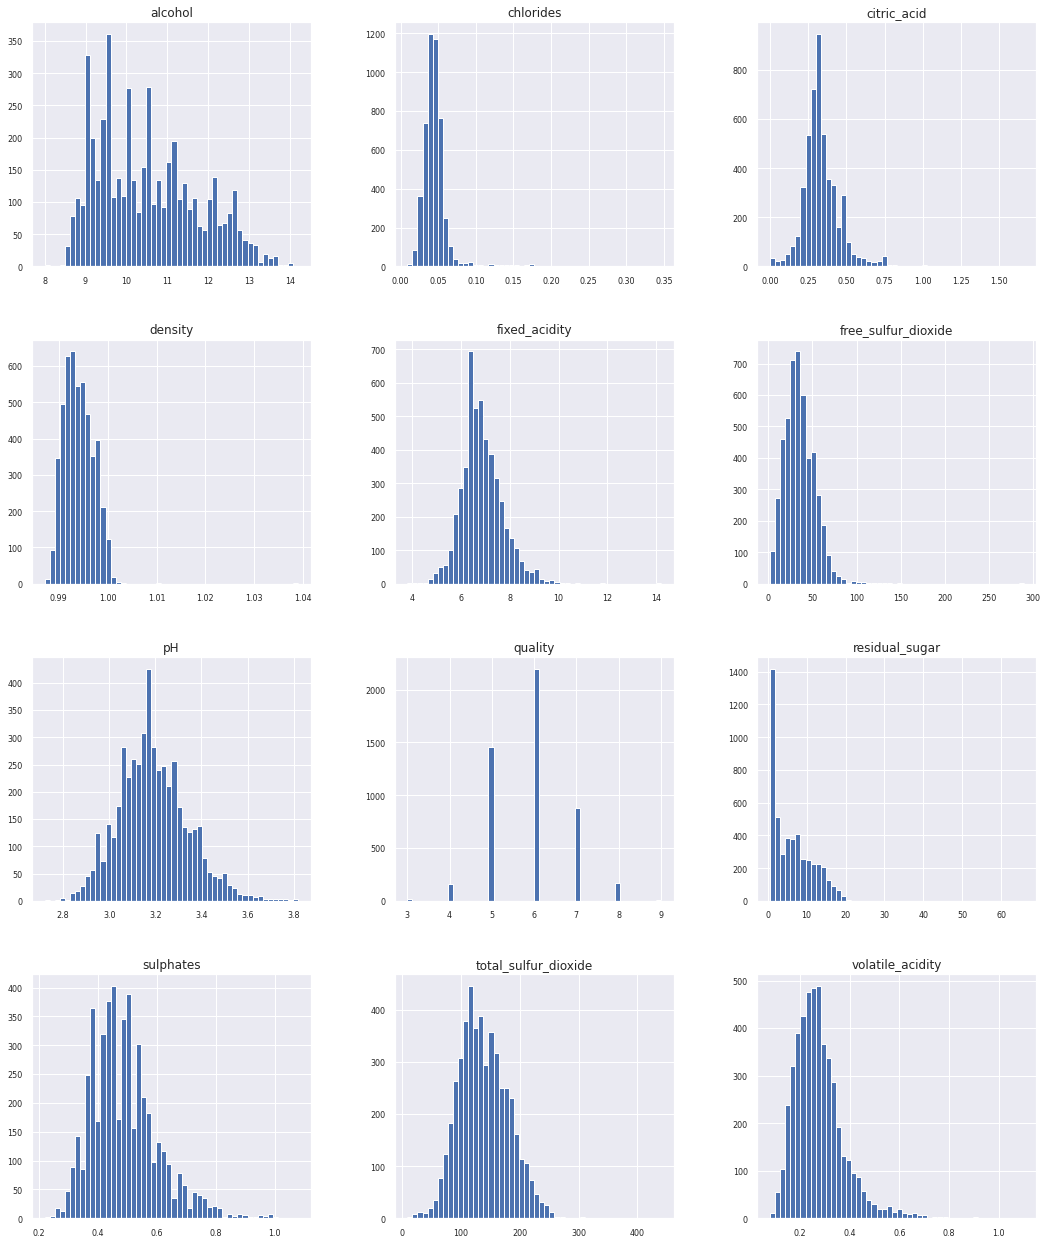

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3796145588>,
      dtype=object)

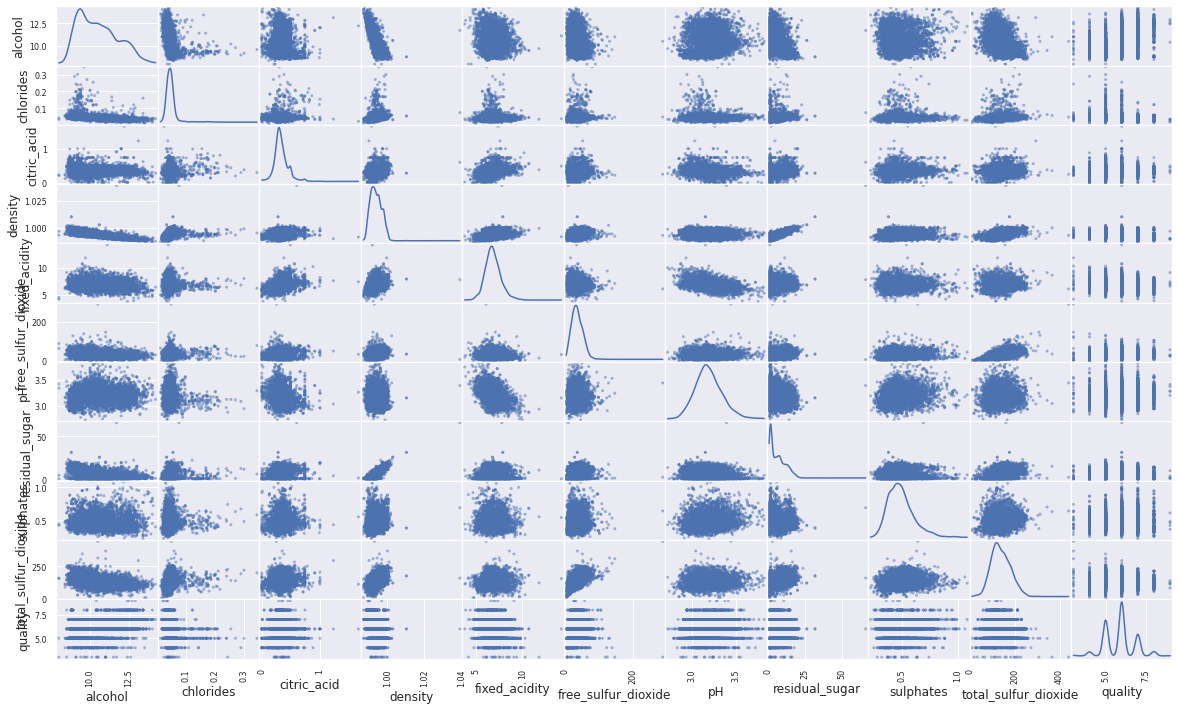

In [ ]:
sns.set()
feat = ['alcohol','chlorides','citric_acid','density','fixed_acidity','free_sulfur_dioxide','pH','residual_sugar','sulphates','total_sulfur_dioxide', 'quality']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')

In [3]:
dataset.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
dataset.corr()['quality'][:-1]

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

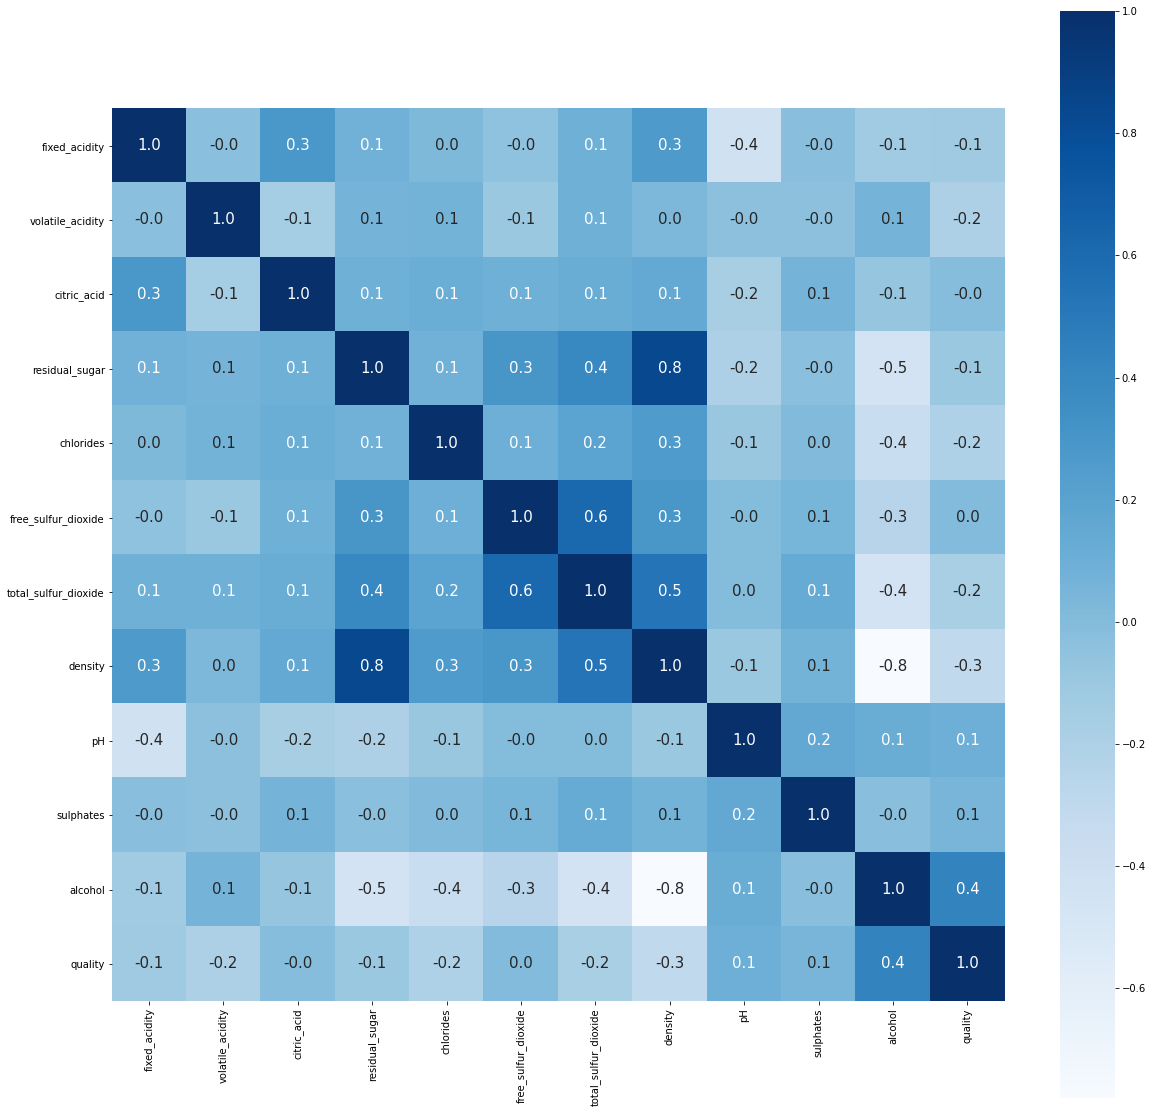

In [5]:
corr = dataset.corr()
# Heatmap untuk melihat korelasi
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [6]:
label = dataset['quality']
features = dataset.drop(['quality'], axis=1)

In [7]:
dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
nullset = dataset.eq(0).any()
print(nullset)

fixed_acidity           False
volatile_acidity        False
citric_acid              True
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [9]:
#dataset_filtered = dataset[dataset['citric_acid'] != 0]
#dataset_filtered = dataset[dataset['alcohol'] != 0]
#dataset_filtered = dataset[dataset['pH'] != 0]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler



scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  lm = LinearRegression()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.5548832994203459
MAE (Mean Absolute Error) 0.5804267647459406
r^2 score 0.28945404531481445
RMSE (Root Mean Squared Error 0.7449048928691138

Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.5548832994203459
MAE (Mean Absolute Error) 0.5804267647459406
r^2 score 0.28945404531481445
RMSE (Root Mean Squared Error 0.7449048928691138

Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 0.5548832994203459
MAE (Mean Absolute Error) 0.5804267647459406
r^2 score 0.28945404531481445
RMSE (Root Mean Squared Error 0.7449048928691138

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 0.5548832994203459
MAE (Mean Absolute Error) 0.5804267647459406
r^2 s

**Kesimpulan**

Berdasarkan penggunaan preprocessing yang berbeda-beda dan menggunakan algoritma Linear Regression diatas tidak mempengaruhi R2 Score, MSE, MAE dan RMSE

In [11]:
# Random Forest
scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  from sklearn.ensemble import RandomForestRegressor
  lm = RandomForestRegressor()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.355432
MAE (Mean Absolute Error) 0.4335020408163266
r^2 score 0.5448578646546222
RMSE (Root Mean Squared Error 0.5961811805147827

Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.35215502040816327
MAE (Mean Absolute Error) 0.43235102040816314
r^2 score 0.5490541426737983
RMSE (Root Mean Squared Error 0.5934265080093434

Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 0.3521711836734694
MAE (Mean Absolute Error) 0.4318122448979592
r^2 score 0.5490334450914602
RMSE (Root Mean Squared Error 0.5934401264436618

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 0.35366269387755106
MAE (Mean Absolute Error) 0.4320326530612245
r^2 score 0.547

In [12]:
# XGBoost

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  import xgboost as xgb
  lm = xgb.XGBRegressor()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

[01:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.4672731123131249
MAE (Mean Absolute Error) 0.5366630289505939
r^2 score 0.4016417145117034
RMSE (Root Mean Squared Error 0.6835737797144686

[01:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.4672731123131249
MAE (Mean Absolute Error) 0.5366630289505939
r^2 score 0.4016417145117034
RMSE (Root Mean Squared Error 0.6835737797144686

[01:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 0.4672731123131249
MAE (Mean Absolute Error) 0.5366

In [13]:
# SVM Regressor

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  from sklearn.svm import SVR
  svkernel = ("rbf", "linear", "poly")
  for j in svkernel:
    lm = SVR()
    lm.fit(feature_train, label_train)

    predictions = lm.predict(feature_test)
    mse = mean_squared_error(label_test, predictions)
    mae = mean_absolute_error(label_test, predictions)
    r2 = r2_score(label_test, predictions)
    print("SVR Kernel : " +str(j))
    print("Using " +str(i))
    print("MSE (Mean Squared Error)", mse)
    print("MAE (Mean Absolute Error)", mae)
    print("r^2 score", r2)
    print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
    print("")

SVR Kernel : rbf
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.6750740927364178
MAE (Mean Absolute Error) 0.6290261863826166
r^2 score 0.13554585944879238
RMSE (Root Mean Squared Error 0.8216289264238558

SVR Kernel : linear
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.6750740927364178
MAE (Mean Absolute Error) 0.6290261863826166
r^2 score 0.13554585944879238
RMSE (Root Mean Squared Error 0.8216289264238558

SVR Kernel : poly
Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.6750740927364178
MAE (Mean Absolute Error) 0.6290261863826166
r^2 score 0.13554585944879238
RMSE (Root Mean Squared Error 0.8216289264238558

SVR Kernel : rbf
Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.6750740927364178
MAE (Mean Absolute Error) 0.6290261863826166
r^2 score 0.13554585944879238
RMSE (Root Mean Squared Error 0.8216289

In [14]:
# KNN Regressor

scalr = (preprocessing.StandardScaler(), preprocessing.PowerTransformer(method='yeo-johnson'), preprocessing.PowerTransformer(method='box-cox'), preprocessing.QuantileTransformer(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler(), preprocessing.RobustScaler())
for i in scalr:
  scaler = (i)

  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

  from sklearn.neighbors import KNeighborsRegressor
  lm = KNeighborsRegressor()
  lm.fit(feature_train, label_train)

  predictions = lm.predict(feature_test)
  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("Using " +str(i))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  print("")

Using StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 0.6550204081632652
MAE (Mean Absolute Error) 0.6377142857142858
r^2 score 0.16122524908778746
RMSE (Root Mean Squared Error 0.8093333109190954

Using PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.6550204081632652
MAE (Mean Absolute Error) 0.6377142857142858
r^2 score 0.16122524908778746
RMSE (Root Mean Squared Error 0.8093333109190954

Using PowerTransformer(copy=True, method='box-cox', standardize=True)
MSE (Mean Squared Error) 0.6550204081632652
MAE (Mean Absolute Error) 0.6377142857142858
r^2 score 0.16122524908778746
RMSE (Root Mean Squared Error 0.8093333109190954

Using QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
MSE (Mean Squared Error) 0.6550204081632652
MAE (Mean Absolute Error) 0.6377142857142858
r^2 s

**Kesimpulan**
R2 Score terbesar berada pada model Random Forest. Dimana:

Using MinMaxScaler(copy=True, feature_range=(0, 1))

MSE (Mean Squared Error) 0.347009306122449

MAE (Mean Absolute Error) 0.42901224489795914

r^2 score 0.5556433957176357

RMSE (Root Mean Squared Error 0.5890749579828097
